In [20]:
import wave

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io.wavfile as wavfile
from scipy import spatial
from scipy.fftpack import rfft, irfft, fftfreq, rfftfreq

%matplotlib inline

In [10]:
def get_similarity(vec1, vec2):
    return 1 - spatial.distance.cosine(vec1, vec2)

In [4]:
fs, aud = wavfile.read('video/audio_v83196893.wav')

In [34]:
aud_mono = aud.mean(axis=1)

In [33]:
# Get fingerprint region and aggregate target video into data frame without integrating
sample_rate = 8000
interval = 1
chan = aud_mono
fingerprint = chan[sample_rate*(5340-4):sample_rate*(5340)]
_max = max(chan)
_min = min(chan)
normalized = [(v - _min)/(_max - _min) for v in fingerprint]

In [35]:
fingerprint = normalized

32000


In [26]:
fingerprint = df[(df['second'] >= 5340-4) & (df['second'] <= 5340)]['integral'].tolist()

In [27]:
fs_validate, aud_validate = wavfile.read('/Volumes/Passport/LiveBeat/audio/Fnatic vs MVP The International 2016 TI6 Highlights Lower Bracket Dota 2.wav')

In [37]:
# Get validation audio into data frame
sample_rate = 8000
interval = 1
chan = aud_validate
_max = max(chan)
_min = min(chan)
norm_validate = [(v - _min)/(_max - _min) for v in chan]

In [40]:
similarities = []
for i in np.arange(0, len(norm_validate)-32000, 1):
    similarities.append(get_similarity(fingerprint, norm_validate[i:i+32000]))

KeyboardInterrupt: 

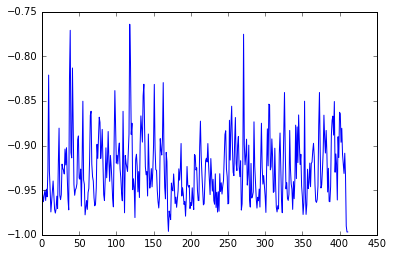

In [39]:
plt.plot(similarities)

In [36]:
# Get fingerprint region and aggregate target video into data frame
sample_rate = 8000
interval = 1
chan = aud.mean(axis=1)
integral = []
frames = np.arange(0, len(chan), interval*sample_rate)
for i in frames:
    second = int(i/sample_rate)
    section = chan[i:i+interval*sample_rate]
    integral.append(sum(abs(chan[i:i+interval*sample_rate])))

integral = [(v - min(integral))/(max(integral) - min(integral)) for v in integral]
seconds = [int(v/8000) for v in frames]
df = pd.DataFrame(seconds)
df['integral'] = pd.DataFrame(integral)
df.columns = ['second', 'integral']